In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
data = pd.read_csv(r"C:\Users\David gathara marigi\Downloads\Bank_Churn.csv")  
print(data.head(6))

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   
5    15574012       Chu          645     Spain    Male   44       8   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   
5  113755.78              2          1              

In [7]:
print(data.isna().sum())
#Has no missing values

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
print(data.duplicated().sum())
# has no duplicates

0


In [9]:
print(data.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


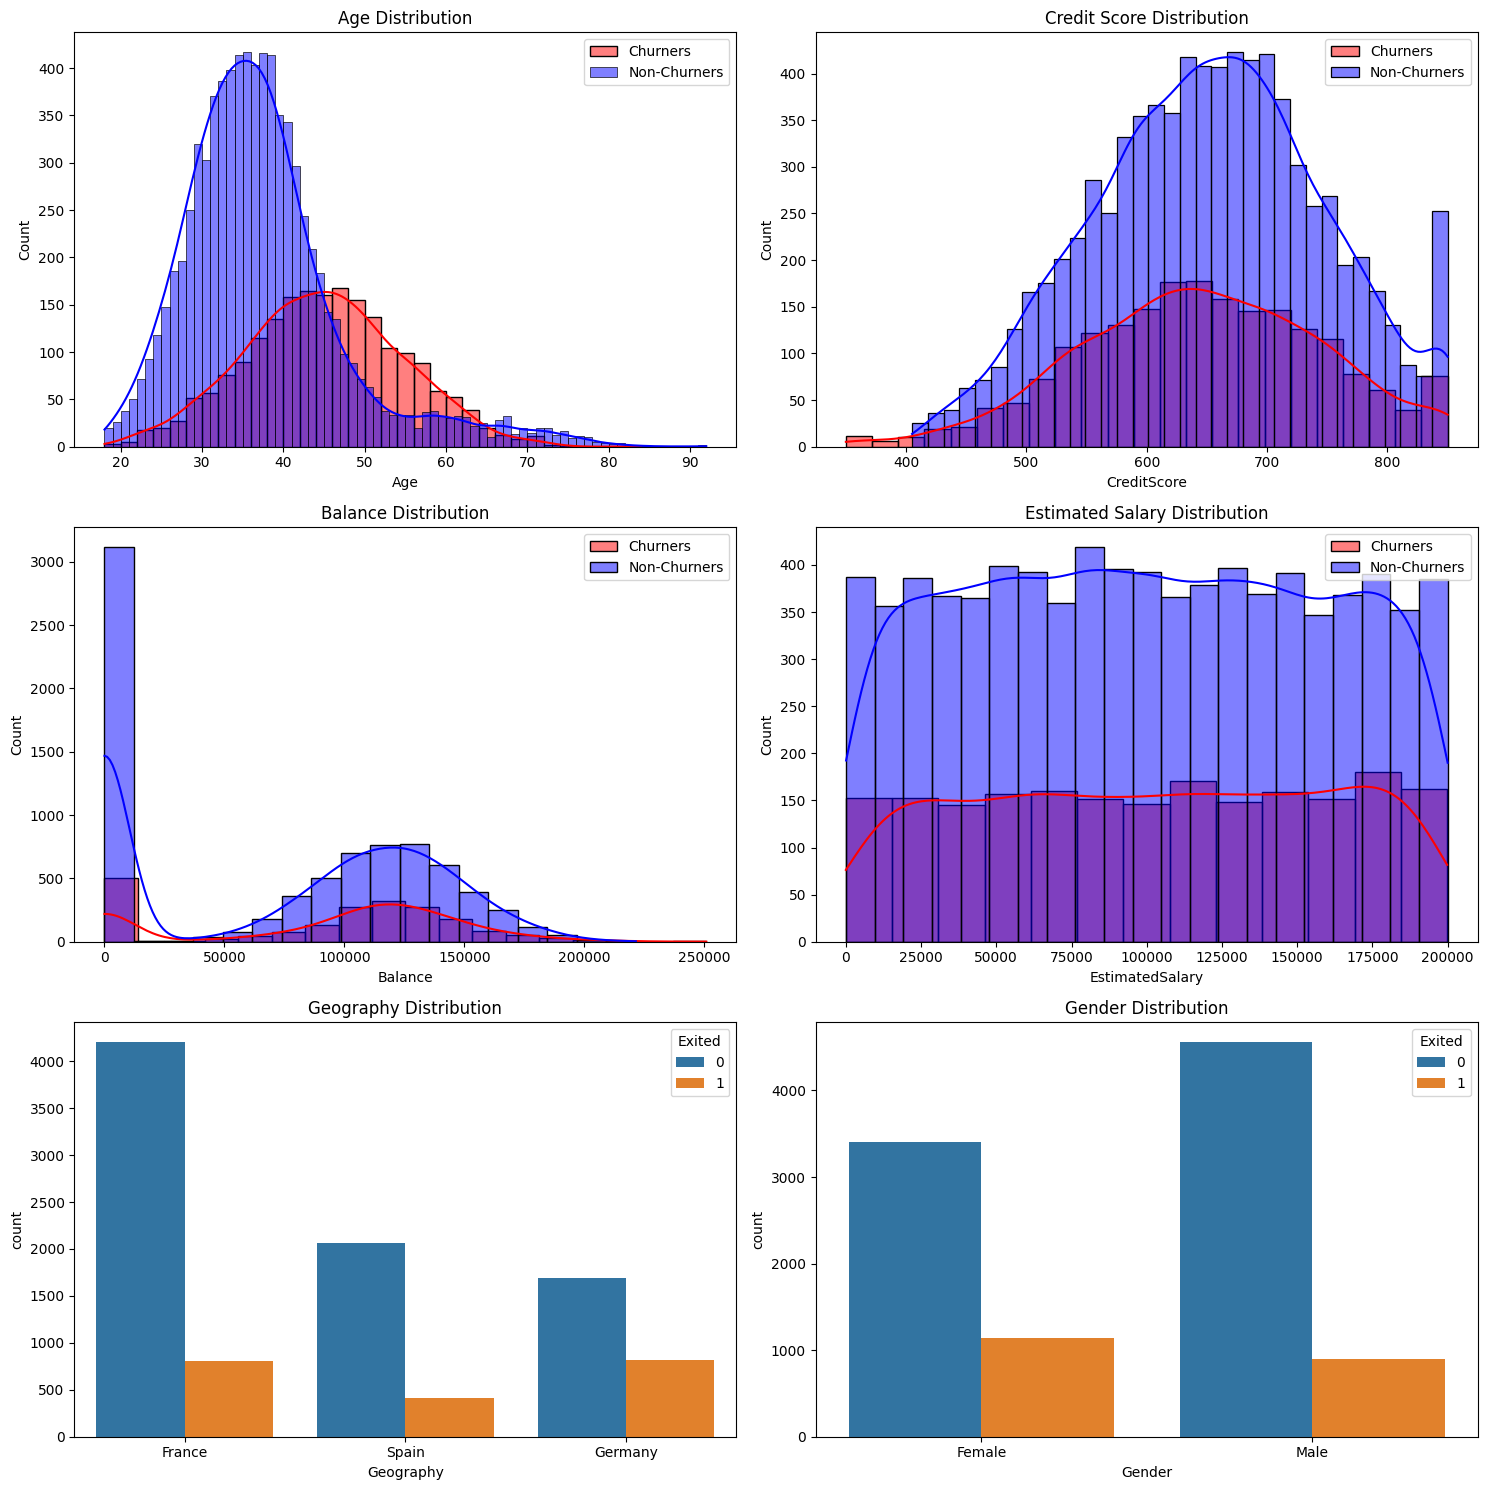

In [11]:
# Separate churners and non-churners
churners = data[data['Exited'] == 1]
non_churners = data[data['Exited'] == 0]

# Compare distributions of different attributes
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(churners['Age'], kde=True, color='red', label='Churners', ax=axes[0, 0])
sns.histplot(non_churners['Age'], kde=True, color='blue', label='Non-Churners', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].legend()

sns.histplot(churners['CreditScore'], kde=True, color='red', label='Churners', ax=axes[0, 1])
sns.histplot(non_churners['CreditScore'], kde=True, color='blue', label='Non-Churners', ax=axes[0, 1])
axes[0, 1].set_title('Credit Score Distribution')
axes[0, 1].legend()

sns.histplot(churners['Balance'], kde=True, color='red', label='Churners', ax=axes[1, 0])
sns.histplot(non_churners['Balance'], kde=True, color='blue', label='Non-Churners', ax=axes[1, 0])
axes[1, 0].set_title('Balance Distribution')
axes[1, 0].legend()

sns.histplot(churners['EstimatedSalary'], kde=True, color='red', label='Churners', ax=axes[1, 1])
sns.histplot(non_churners['EstimatedSalary'], kde=True, color='blue', label='Non-Churners', ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary Distribution')
axes[1, 1].legend()

sns.countplot(x='Geography', hue='Exited', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Geography Distribution')

sns.countplot(x='Gender', hue='Exited', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

C:\Users\David gathara marigi\AppData\Local\Temp\ipykernel_8028\1295556373.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, ax=axes[1], palette='viridis')
C:\Users\David gathara marigi\AppData\Local\Temp\ipykernel_8028\1295556373.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Geography', data=data, ax=axes[2], palette='viridis')


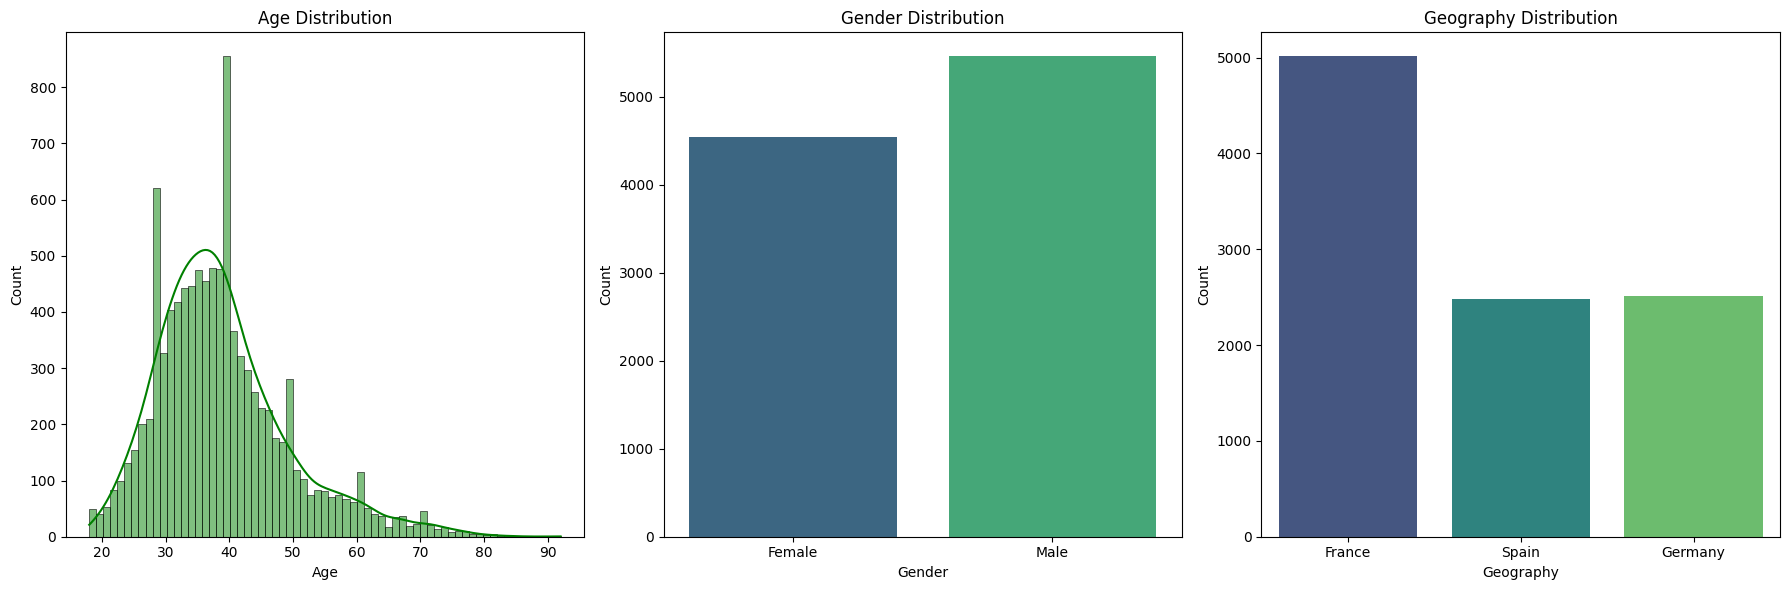

In [12]:
# Overall demographics of the bank's customers

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age distribution
sns.histplot(data['Age'], kde=True, ax=axes[0], color='green')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Gender distribution
sns.countplot(x='Gender', data=data, ax=axes[1], palette='viridis')
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Geography distribution
sns.countplot(x='Geography', data=data, ax=axes[2], palette='viridis')
axes[2].set_title('Geography Distribution')
axes[2].set_xlabel('Geography')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Group data by Geography
grouped_data = data.groupby('Geography').mean()

# Plot the comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Credit Score comparison
sns.barplot(x=grouped_data.index, y=grouped_data['CreditScore'], ax=axes[0], palette='viridis')
axes[0].set_title('Average Credit Score by Geography')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Average Credit Score')

# Balance comparison
sns.barplot(x=grouped_data.index, y=grouped_data['Balance'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Balance by Geography')
axes[1].set_xlabel('Geography')
axes[1].set_ylabel('Average Balance')

# Estimated Salary comparison
sns.barplot(x=grouped_data.index, y=grouped_data['EstimatedSalary'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Estimated Salary by Geography')
axes[2].set_xlabel('Geography')
axes[2].set_ylabel('Average Estimated Salary')

plt.tight_layout()
plt.show()

In [13]:
# Select relevant features for clustering
features = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering# Select relevant features for clustering# Select relevant features for clustering

NameError: name 'StandardScaler' is not defined